<a href="https://colab.research.google.com/github/branified/StockPricePredictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price Predictor
*Using machine learning to predict stock prices and to see the accracy of the model*


# Software Set Up
Importing libraries for use.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Data
Getting the stock information from yfinance. Using tech stocks "Apple", "Google", "Microsoft", and "Amazon"

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
enddate = datetime.now()
startdate = datetime(enddate.year - 1, enddate.month, enddate.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, startdate, enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Data Visual Inspection
Printing the data in order to get a feel for what it looks like initially. We see that there are seven variables for our data. The variables include the stock prices at three times: open of market, high, and low.

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819138,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819138,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
2022-06-29,137.460007,140.669998,136.669998,139.229996,138.403549,66242400,APPLE
2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500,APPLE
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105347,71051600,APPLE
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800,APPLE
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,APPLE


# Stocks Closing Price
The graphs below show the historical view of the closing price of the stocks. The time frame for the examination is from June 2022 to June 2023. There is a graph for the stocks from each of the companies Apple, Google, Microsoft, and Amazon.

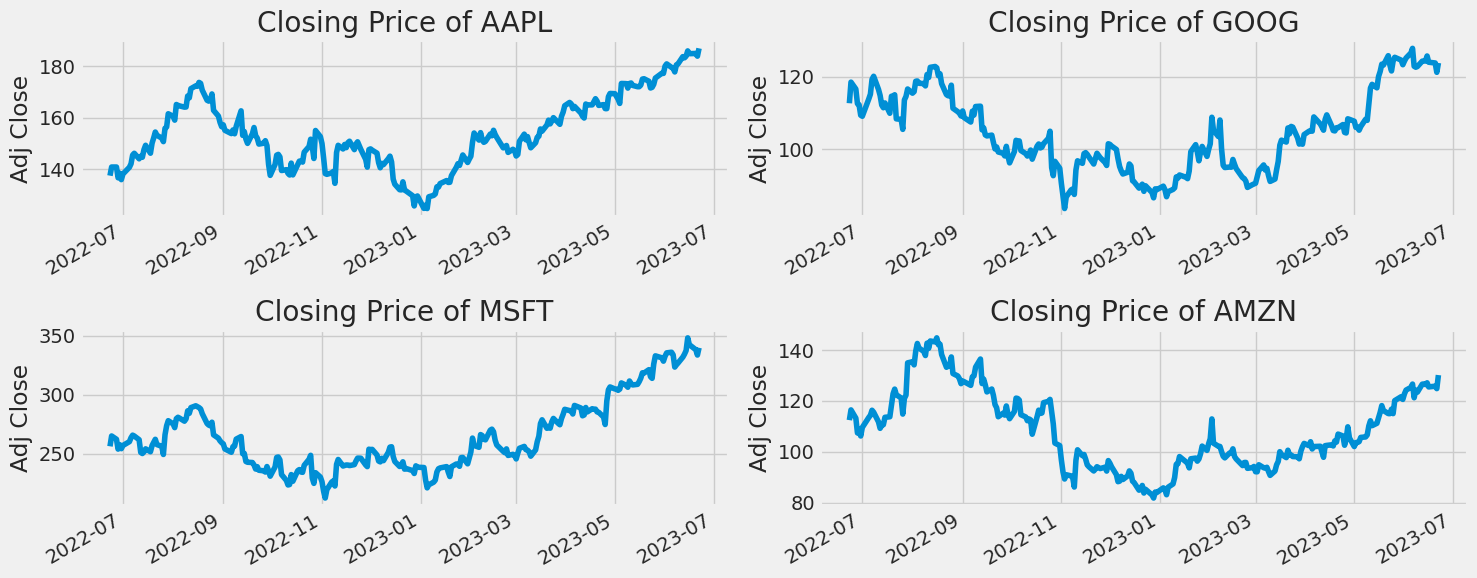

In [5]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


Below are the closing prices for the tech stocks in one dataframe. This is the same data as above but just in data frame form to enable its use in the model.

In [6]:
closing_df = pdr.get_data_yahoo(tech_list, start=startdate, end=enddate)['Adj Close']
closing_df.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-23,137.449265,112.440002,112.684502,256.381775
2022-06-24,140.819138,116.459999,118.538002,265.137146
2022-06-27,140.819138,113.220001,116.622498,262.354034
2022-06-28,136.624191,107.400002,112.571503,254.024551
2022-06-29,138.403564,108.919998,112.256500,257.768372


# Daily Returns
Below is the daily returns for each of the companies put into one data frame.

In [7]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-23,NaN,NaN,NaN,NaN
2022-06-24,0.024517,0.035752,0.051946,0.034150
2022-06-27,0.000000,-0.027821,-0.016159,-0.010497
2022-06-28,-0.029790,-0.051404,-0.034736,-0.031749
2022-06-29,0.013024,0.014153,-0.002798,0.014738


# Analysis of Stock Prices

Below, we can see that the distributions for stocks for each company is roughly a normal distribution. For the various combinations of the pairplots, there is a consistent positive slope to the scatterplots.

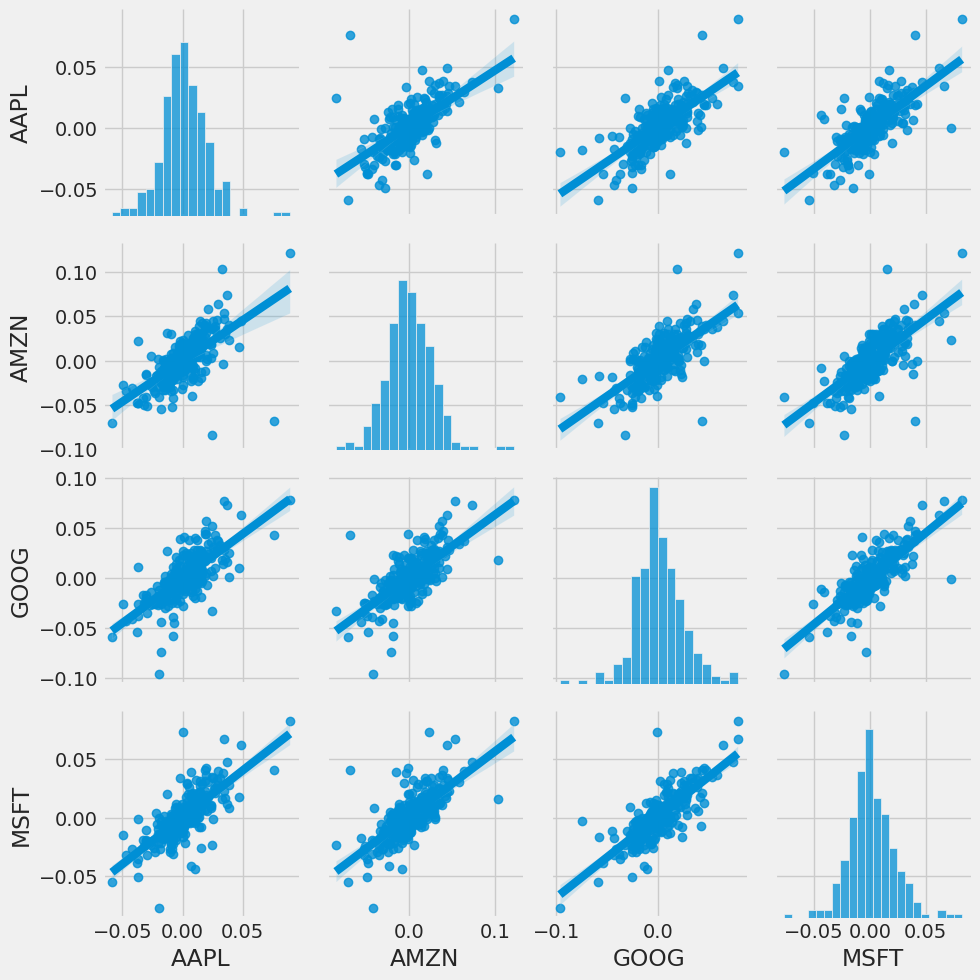

In [8]:
sns.pairplot(tech_rets, kind='reg')

Looking at the analysis below, we can see that higher correlations exist between Apple and Google, Apple and Microsoft, and Google and Microsoft for the daily returns of the stocks.

<Axes: >

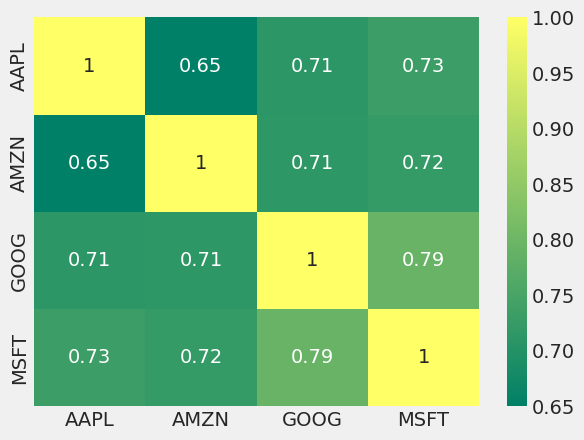

In [9]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

The heat map below shows the correlation between companies for closing prices. Here we see different correlations than above with Microsoft and Google and Amazon and Google having the higher correlations.

<Axes: >

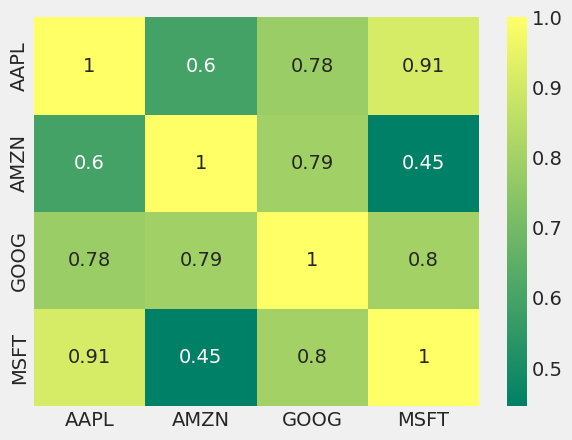

In [10]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

From the results you can see that Google and Microsoft has the biggest positive correlation and that overall all the stocks have a positive correlation.

## Machine Learning

To train a model to predict the closing prices of stocks using the Keras Module.

In [20]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95 ))

training_data_len

954

The total number of data points we are using for training and testing is 954.


In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.2119949 ],
       [0.22472586],
       [0.22472586],
       ...,
       [0.16508937],
       [0.16152171],
       [0.18150065]])

We are scaling the data to group together similar data points to make it easier for the algorithm to learn.

The code below creates the training data set used to train the model.

In [22]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.2119949 , 0.22472586, 0.22472586, 0.20887788, 0.2156001 ,
       0.20617395, 0.21447346, 0.22435029, 0.2294577 , 0.24233891,
       0.24493012, 0.23678081, 0.24049872, 0.23910922, 0.25030044,
       0.25668468, 0.24504283, 0.25980171, 0.26746279, 0.27613792,
       0.27140602, 0.26712481, 0.262055  , 0.28154571, 0.28364881,
       0.30302686, 0.29927142, 0.29363825, 0.31662161, 0.31541984,
       0.31369237, 0.31188972, 0.3120775 , 0.32830105, 0.32548447,
       0.33904163, 0.34313505, 0.34253416, 0.34824246, 0.34674024,
       0.33686346, 0.32202946, 0.32075257, 0.32187921, 0.33126783,
       0.30719541, 0.29878325, 0.28950729, 0.28316058, 0.28593963,
       0.27786539, 0.27305842, 0.27842874, 0.27279557, 0.28372388,
       0.30648187, 0.27046716, 0.27598767, 0.26494665, 0.25867506])]
[0.27287064099433345]

[array([0.2119949 , 0.22472586, 0.22472586, 0.20887788, 0.2156001 ,
       0.20617395, 0.21447346, 0.22435029, 0.2294577 , 0.24233891,
       0.24493012, 0.23678081, 0.24

This is where the Keras module was used to train the model using the training set we created.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

894/894 [==============================] - 40s 40ms/step - loss: 0.0073


Here we create the testing dataset and get the predicted values. We also calculate the RMSE value to see the accuracy of the model.



In [24]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 26ms/step


2.743038687803738

We get an RMSE value of 8.65 which is a good indicator that our model is pretty accurate as the lower the score the better.

# Output -- Predictions

The output below are the predictions from the model and the actual closing prices of the stocks. The predictions are in two forms below, one a table and the other a time series graph.

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

,Close,Predictions
Date,,
2023-04-12,97.830002,102.148766
2023-04-13,102.400002,101.167885
2023-04-14,102.510002,100.823723
2023-04-17,102.739998,100.976944
2023-04-18,102.300003,101.438400
2023-04-19,104.300003,101.916046
2023-04-20,103.809998,102.619232
2023-04-21,106.959999,103.246895
2023-04-24,106.209999,104.214653


<Axes: xlabel='Date', ylabel='Close'>

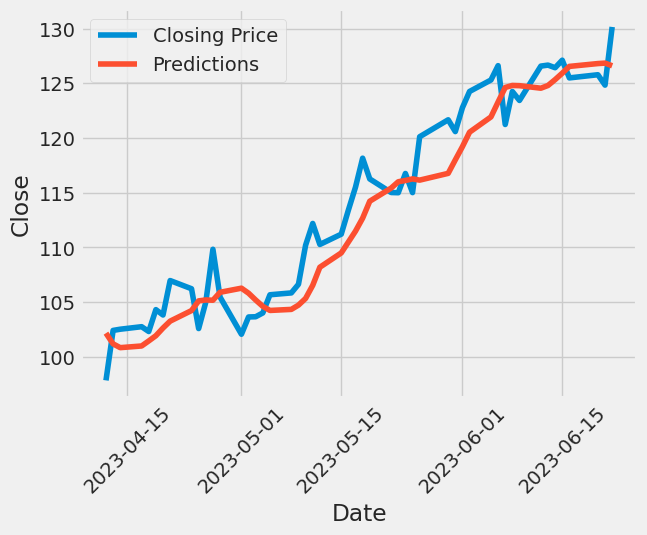

In [35]:
sns.lineplot(x = "Date", y = "Close", data = valid, label = "Closing Price")
plt.xticks(rotation=45)
sns.lineplot(x="Date", y = "Predictions", data = valid, label = "Predictions")

#Final Thoughts & Future Features

After creating the model and comparing it to the actual prices it is evident that there is a lot of potential here. This model was done with a limited sample of historical data. By adding more data points by increasing the timeframe and observing the relationships between more stocks we will be able to close the gap between the predictions and reality.

Right now there are only 4 stocks being comapred. In the future, I plan to create a front end UI that will allow users to choose what stocks they wish to compare and analyze. This will help further improve the LSTM and add more functionality to the model.